# Plotting on data-aware grids
based on [http://seaborn.pydata.org/tutorial/axis_grids.html](official tutorial)
- "lattice", or "trellis" plotting, [small multiples](https://en.wikipedia.org/wiki/Small_multiple). The term was popularized by Edward Tufte.


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set(style="ticks")
np.random.seed(sum(map(ord, "axis_grids")))
plt.rc('font', family='DejaVu Sans') 

## Datasets

In [2]:
tips = sns.load_dataset("tips")

## FacetGrid

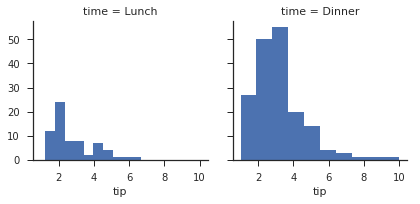

In [3]:
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "tip");

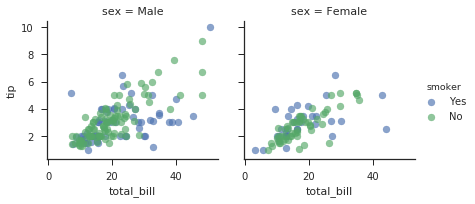

In [4]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.65)
g.add_legend();

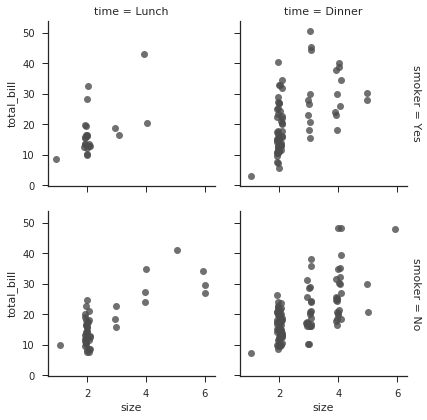

In [5]:
g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1);

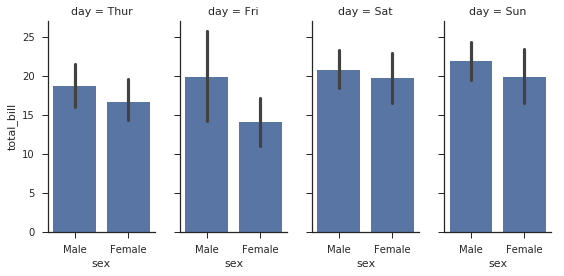

In [6]:
g = sns.FacetGrid(tips, col="day", size=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill");

## Titanic Datasets

In [7]:
titanic = sns.load_dataset("titanic")
titanic = titanic.assign(deck=titanic.deck.astype(object)).sort_values("deck")

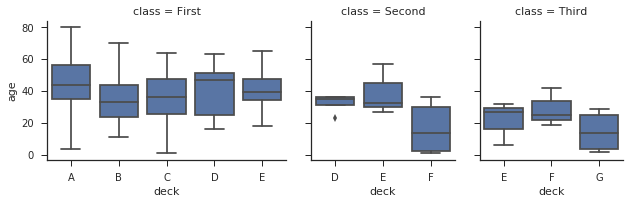

In [8]:
g = sns.FacetGrid(titanic, col="class", sharex=False,
                  gridspec_kws={"width_ratios": [5, 3, 3]})
g.map(sns.boxplot, "deck", "age");

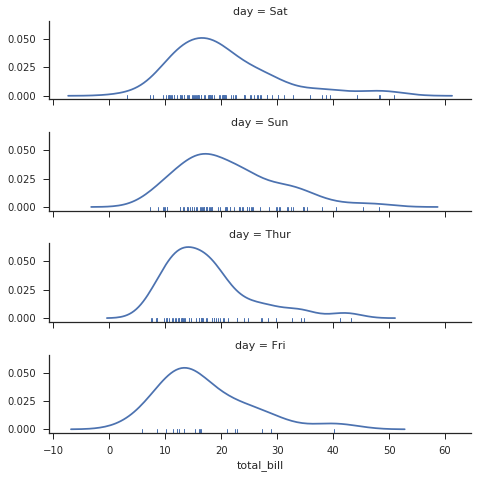

In [9]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  size=1.7, aspect=4,)
g.map(sns.distplot, "total_bill", hist=False, rug=True);

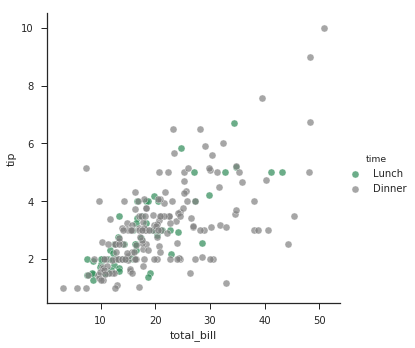

In [10]:
pal = dict(Lunch="seagreen", Dinner="gray")
g = sns.FacetGrid(tips, hue="time", palette=pal, size=5)
g.map(plt.scatter, "total_bill", "tip", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend();

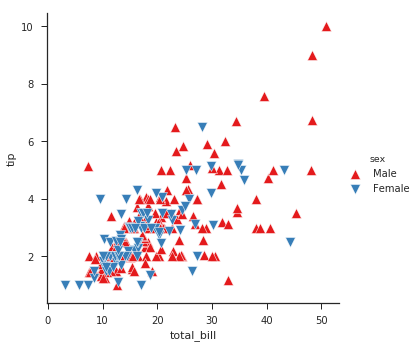

In [11]:
g = sns.FacetGrid(tips, hue="sex", palette="Set1", size=5, hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "total_bill", "tip", s=100, linewidth=.5, edgecolor="white")
g.add_legend();

### Dataset attention

In [12]:
attend = sns.load_dataset("attention").query("subject <= 12")

In [13]:
sns.load_dataset("attention").tail()

,Unnamed: 0,subject,attention,solutions,score
55,55,16,focused,3,7.0
56,56,17,focused,3,6.0
57,57,18,focused,3,6.0
58,58,19,focused,3,6.0
59,59,20,focused,3,5.0


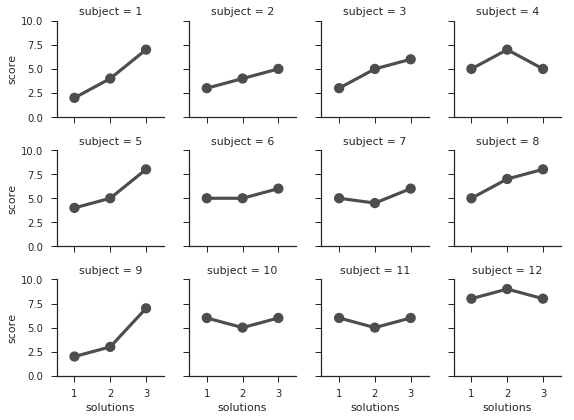

In [14]:
g = sns.FacetGrid(attend, col="subject", col_wrap=4, size=2, ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", color=".3", ci=None);

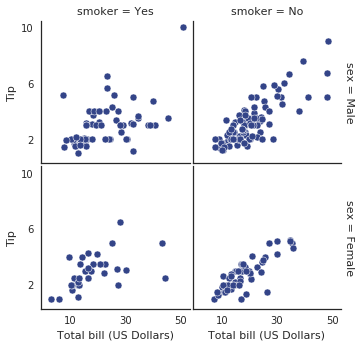

In [15]:
with sns.axes_style("white"):
    plt.rc('font', family='DejaVu Sans') 
    g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, size=2.5)
g.map(plt.scatter, "total_bill", "tip", color="#334488", edgecolor="white", lw=.5);
g.set_axis_labels("Total bill (US Dollars)", "Tip");
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10]);
g.fig.subplots_adjust(wspace=.02, hspace=.02);

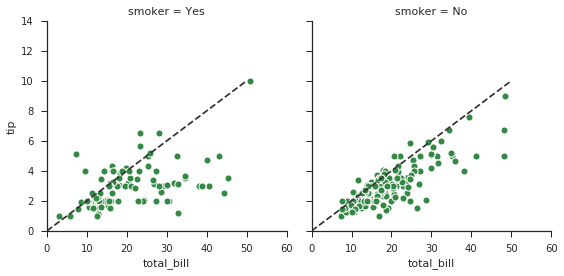

In [16]:
g = sns.FacetGrid(tips, col="smoker", margin_titles=True, size=4)
g.map(plt.scatter, "total_bill", "tip", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes.flat:
    ax.plot((0, 50), (0, .2 * 50), c=".2", ls="--")
g.set(xlim=(0, 60), ylim=(0, 14));

## Mapping custom functions

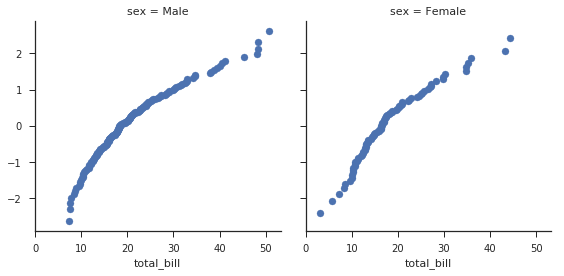

In [17]:
def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)

g = sns.FacetGrid(tips, col="sex", size=4)
g.map(quantile_plot, "total_bill");

### stats.probplot examples

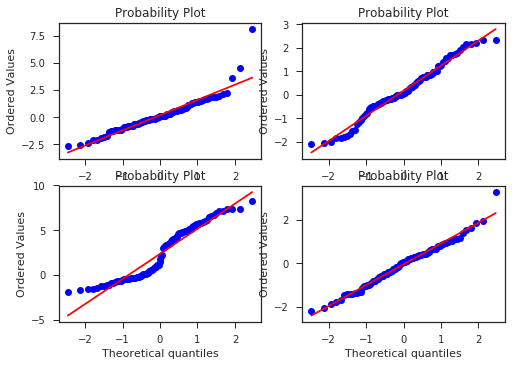

In [18]:
nsample = 100

# A t distribution with small degrees of freedom:

ax1 = plt.subplot(221)
x = stats.t.rvs(3, size=nsample)
res = stats.probplot(x, plot=plt, fit=False)

# A t distribution with larger degrees of freedom:

ax2 = plt.subplot(222)
x = stats.t.rvs(25, size=nsample)
res = stats.probplot(x, plot=plt)

# A mixture of two normal distributions with broadcasting:

ax3 = plt.subplot(223)
x = stats.norm.rvs(loc=[0,5], scale=[1,1.5],
                   size=(nsample//2,2)).ravel()
res = stats.probplot(x, plot=plt)

# A standard normal distribution:

ax4 = plt.subplot(224)
x = stats.norm.rvs(loc=0, scale=1, size=nsample)
res = stats.probplot(x, plot=plt)

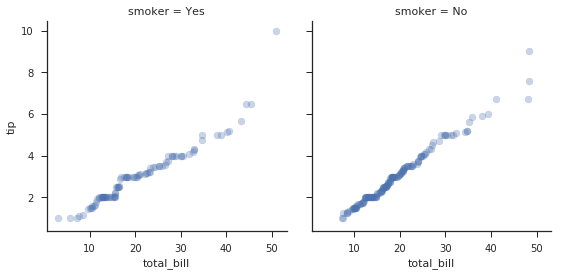

In [19]:
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    #kwargs['color'] = 'green'
    plt.scatter(xr, yr, **kwargs)
    #kwargs['color'] = 'blue'
    #plt.scatter(x, y, **kwargs)

g = sns.FacetGrid(tips, col="smoker", size=4)
g.map(qqplot, "total_bill", "tip", alpha=0.3);

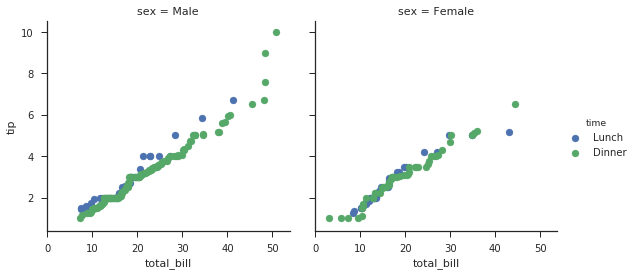

In [20]:
g = sns.FacetGrid(tips, hue="time", col="sex", size=4)
g.map(qqplot, "total_bill", "tip")
g.add_legend();

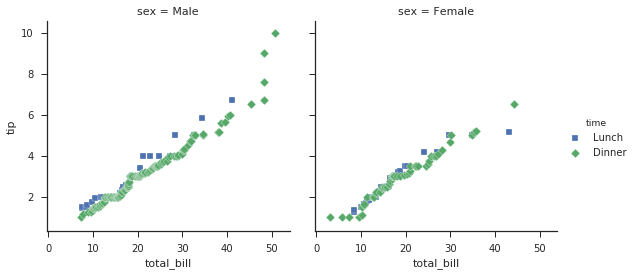

In [21]:
g = sns.FacetGrid(tips, hue="time", col="sex", size=4,
                  hue_kws={"marker": ["s", "D"]})
g.map(qqplot, "total_bill", "tip", s=40, edgecolor="w")
g.add_legend();

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


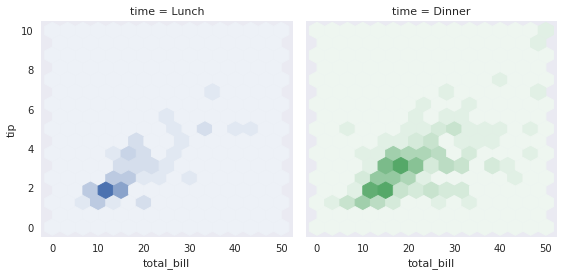

In [22]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    #plt.rc('font', family='DejaVu Sans')
    g = sns.FacetGrid(tips, hue="time", col="time", size=4)

g.map(hexbin, "total_bill", "tip", extent=[0, 50, 0, 10]);

## Plotting pairwise relationships / scatterplot matrix

### Iris Dataset

In [23]:
iris = sns.load_dataset("iris")

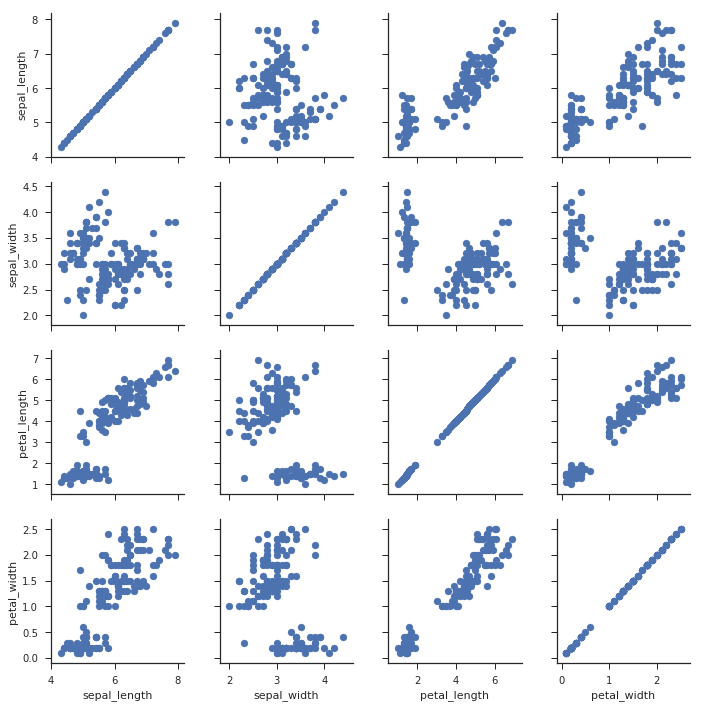

In [24]:
g = sns.PairGrid(iris)
g.map(plt.scatter);

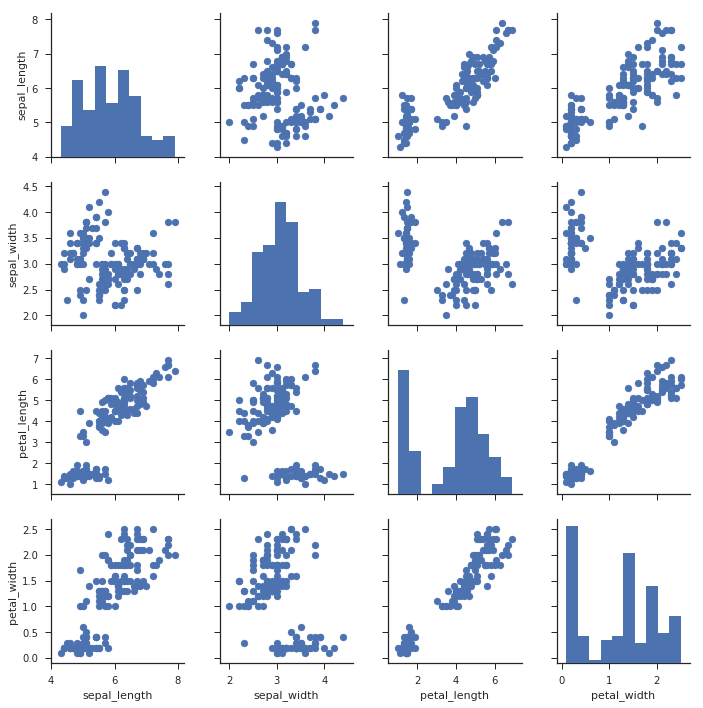

In [25]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

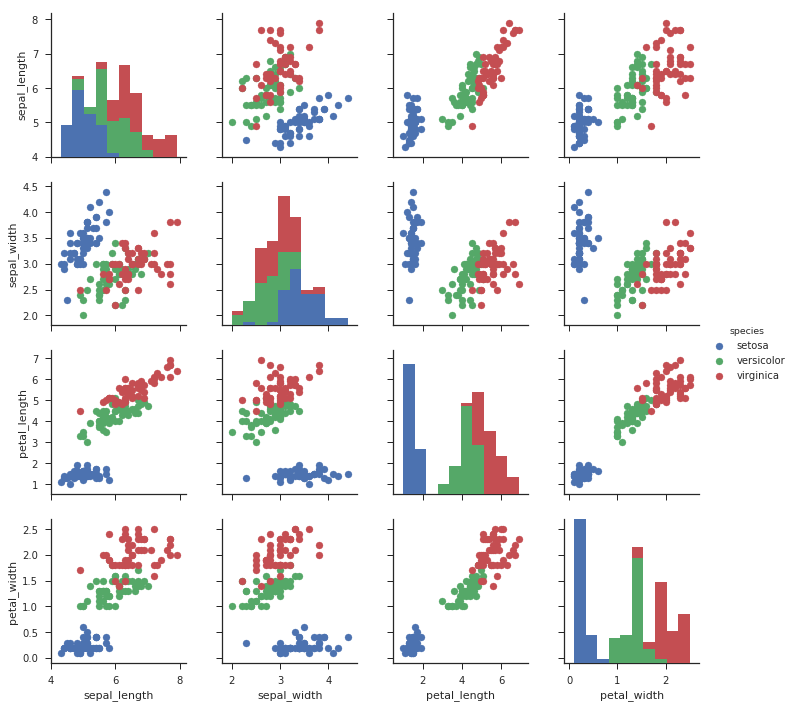

In [26]:
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

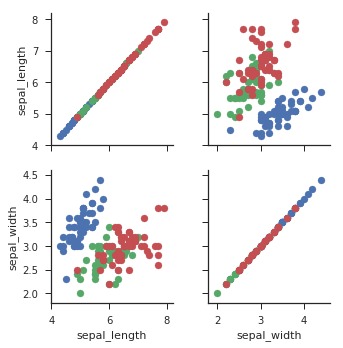

In [27]:
g = sns.PairGrid(iris, vars=["sepal_length", "sepal_width"], hue="species")
g.map(plt.scatter);

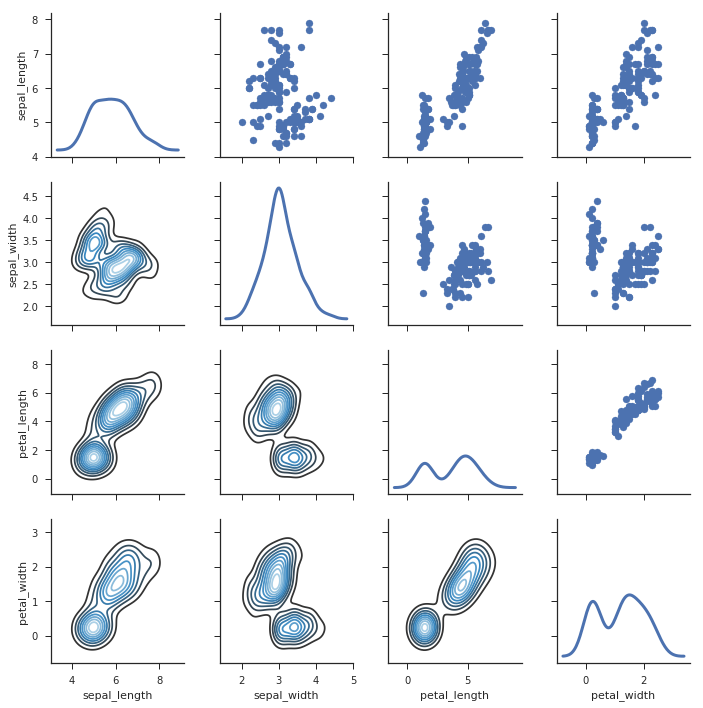

In [28]:
g = sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_diag(sns.kdeplot, lw=3, legend=False);

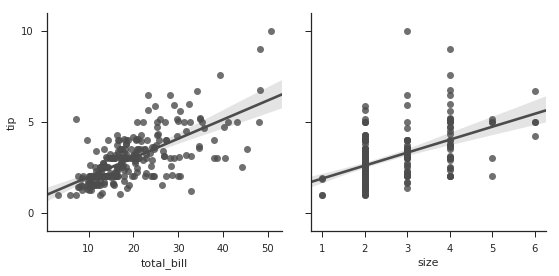

In [29]:
g = sns.PairGrid(tips, y_vars=["tip"], x_vars=["total_bill", "size"], size=4)
g.map(sns.regplot, color=".3")
g.set(ylim=(-1, 11), yticks=[0, 5, 10]);

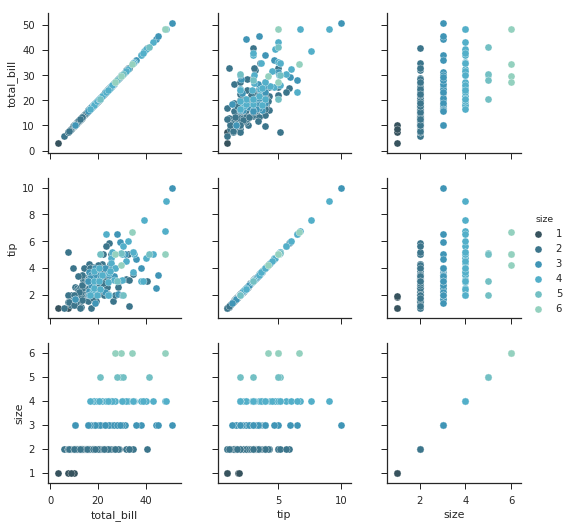

In [30]:
g = sns.PairGrid(tips, hue="size", palette="GnBu_d")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend();

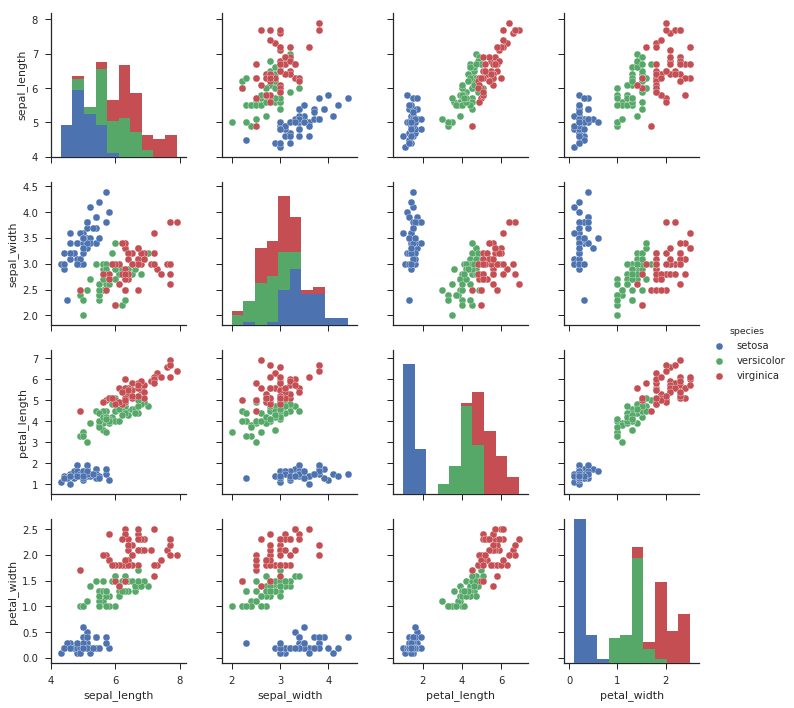

In [31]:
sns.pairplot(iris, hue="species", size=2.5);

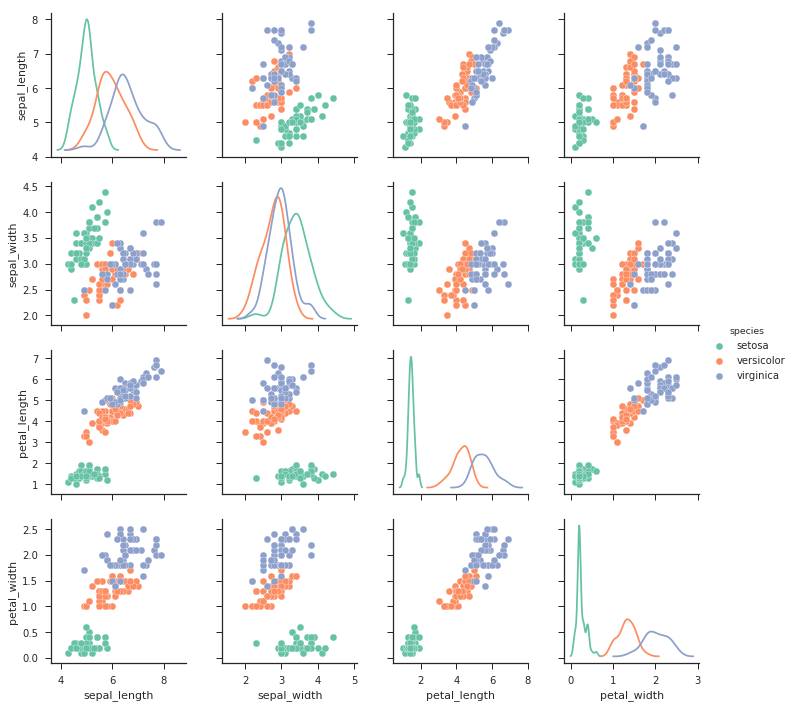

In [32]:
g = sns.pairplot(iris, hue="species", palette="Set2", diag_kind="kde", size=2.5)